## Behavior cloning for end to end driver less cars


In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Flatten
from keras.utils.visualize_util import plot
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

## Load the data from simulator

In [58]:
project_directory = "/Users/kdalwani/cnd/CarND-Behavioral-Cloning-P3/data/sample_training_data/"
log_file_path = "driving_log.csv"

In [59]:
def get_log_files_pd(project_dir, log_file_path):
    lines = []
    log_pd = pd.read_csv(project_dir + log_file_path)
    return log_pd


In [60]:
log_pd = get_log_files_pd(project_directory, log_file_path)

In [61]:
log_pd.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [62]:
def load_training_data(log_pd, project_directory):
    per_record = 2000
    X_train = []
    y_data = []
    for index, row in log_pd.iterrows():
        if index % per_record == 0:
            print(".", end=" ")
        image_path = row['center']
        sterring_val = float(row['steering'])
        image_path = project_directory + image_path
        img = cv2.imread(image_path)    
        X_train.append(img)
        y_data.append(sterring_val)
    return X_train, y_data

In [63]:
X_images, steerings = load_training_data(log_pd, project_directory)
print ("done")

. . . . . done


In [64]:
print ("X train length:", len(X_images))
print ("Y train length:", len(steerings))

X train length: 8036
Y train length: 8036


In [65]:
def plot_sample_train_data(X_data, y_data, images_to_plot=20, images_per_row=4):
    total_rows = (np.ceil)(images_to_plot / images_per_row)
    idx = np.random.choice(range(0, len(X_data)), images_to_plot, replace=False)
    f, axes = plt.subplots(figsize=(25,25))
    for i, index in enumerate(idx):
        plt.subplot(total_rows, images_per_row, i+1)
        plt.axis("off")
        plt.imshow(X_data[index].astype('uint8'))
        plt.title("{:.3f}".format(y_data[index]))
    # plot the mean image    
    plt.imshow(np.mean(X_data, axis=0).astype("uint8"))
    plt.title("Mean image: {:.3f}".format(np.mean(y_data)))
    plt.show()
    


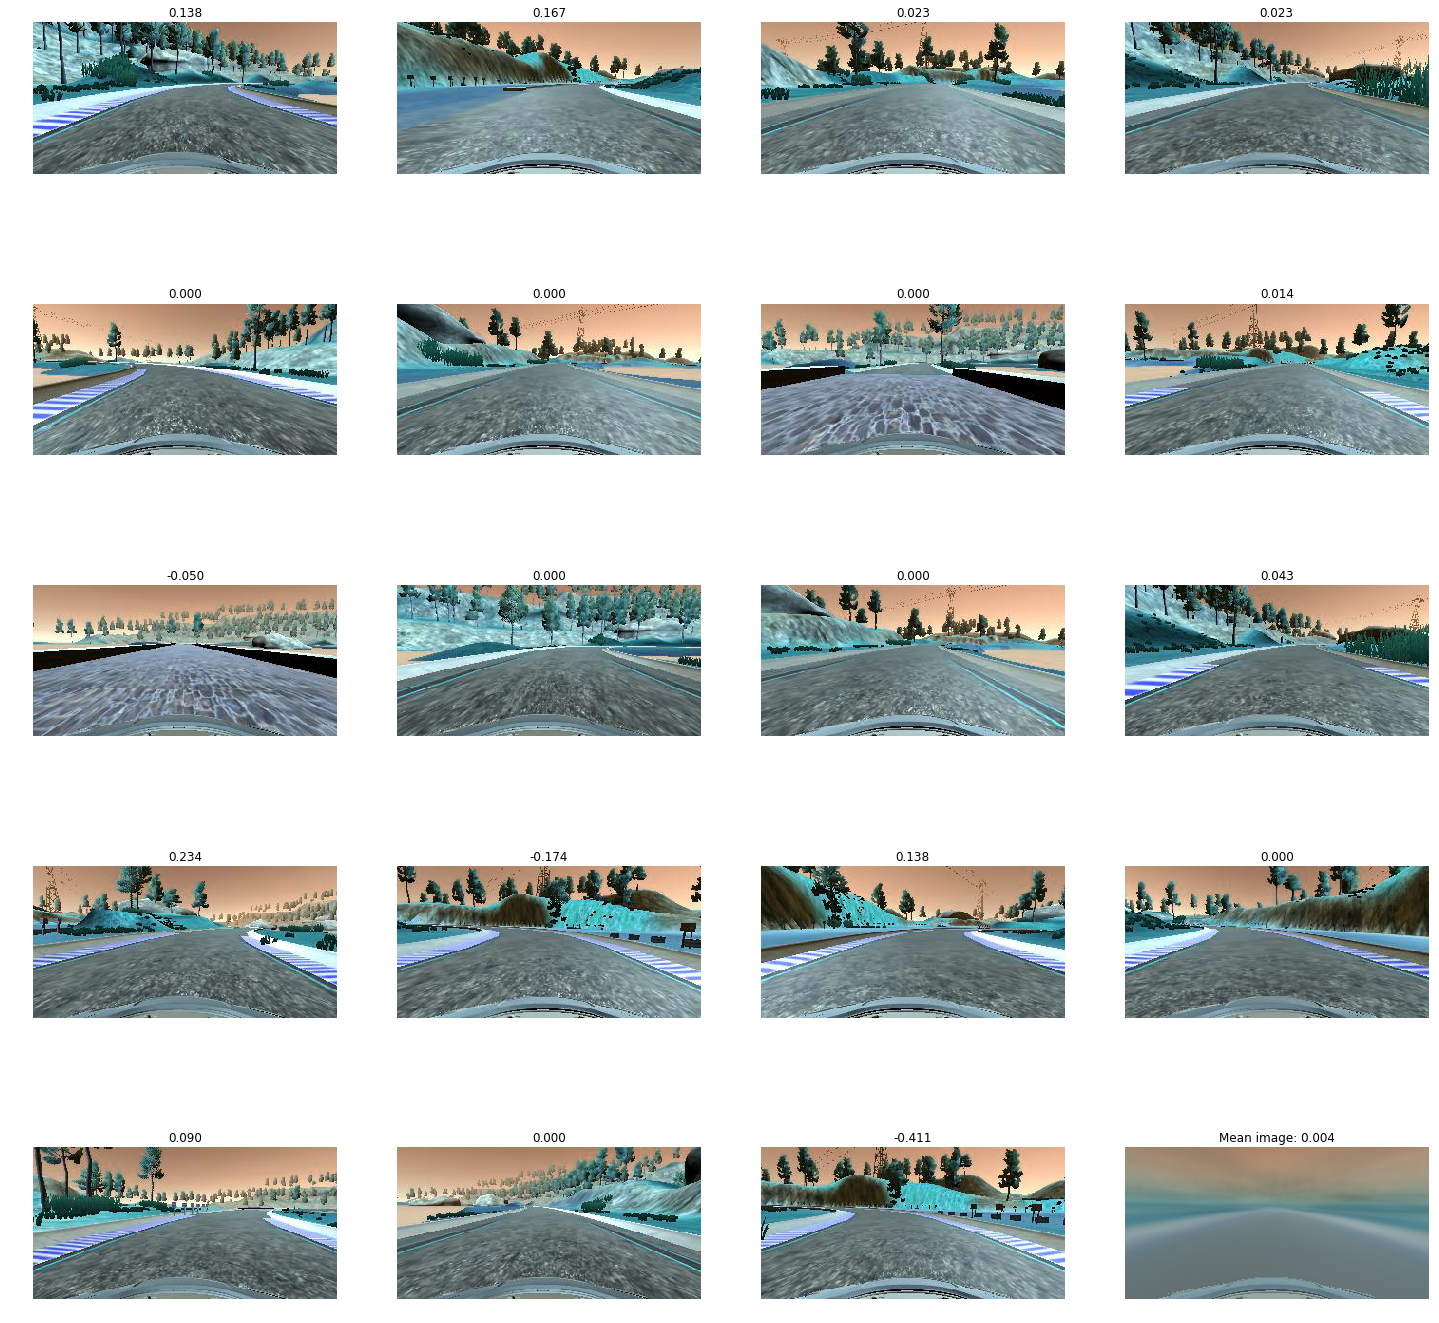

In [66]:
plot_sample_train_data(X_images, steerings, images_to_plot=20)

## Plot mean image

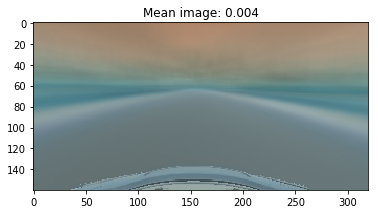

In [67]:
plt.imshow(np.mean(X_images, axis=0).astype("uint8"))
plt.title("Mean image: {:.3f}".format(np.mean(steerings)))
plt.show()


In [68]:
# do the training 

X_train, y_train = np.array(X_images), np.array(steerings)
print (X_train[0].shape)

(160, 320, 3)


In [69]:
y_pd = pd.Series(y_train)
y_pd.describe()

count    8036.000000
mean        0.004070
std         0.128840
min        -0.942695
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

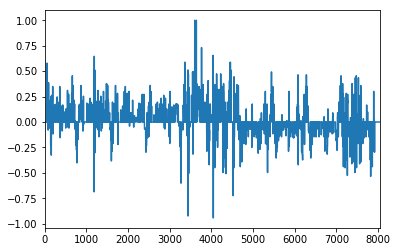

In [70]:
y_pd.plot()

In [88]:
width, height, depth = X_train[0].shape
num_pixels = (width * height* depth)
from keras.utils.visualize_util import plot
model_path = "baseline.h5"
def baseline_model(training_data, target_data):
    model = Sequential()
    model.add(Flatten(input_shape=(width, height, depth)))
#     model.add(Dense(500, init='normal', activation='relu'))
    model.add(Dense(100, init='normal'))
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='adam')
    history = model.fit(training_data, target_data, validation_split=0.2,
                        shuffle=True, nb_epoch=6, verbose=1)
    print ("saving the model architecture")
    plot(model, to_file='model.png', show_shapes=True)
    print ("saving the model file:" + model_path)
    model.save(model_path)
    return model, history


# def baseline_model(training_data, target_data):
#     model = Sequential()
#     model.add(Flatten(input_shape=(width, height, depth)))
# #     model.add(Dense(100, init='normal', activation='relu'))
#     model.add(Dense(1))
    
#     model.compile(loss='mse', optimizer='adam')
#     model.fit(training_data, target_data, validation_split=0.2, shuffle=True, nb_epoch=2, verbose=2)
# #     print (np.round(model.predict(training_data)))
#     plot(model, to_file='model.png', show_shapes=True)    

In [89]:
model, histroy = baseline_model(X_train, y_train)

Train on 6428 samples, validate on 1608 samples
Epoch 1/6
6428/6428 [==============================] - 55s - loss: 611009848.4916 - val_loss: 890294.4489

dict_keys(['loss', 'val_loss'])


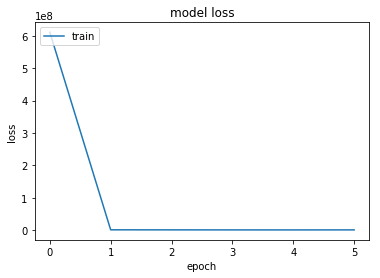

dict_keys(['loss', 'val_loss'])


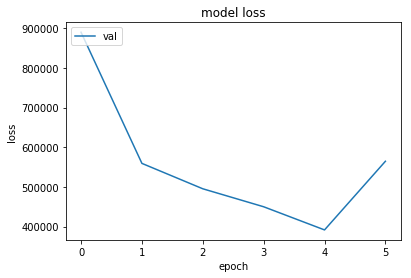

In [90]:
# list all data in history
print(histroy.history.keys())

# summarize history for loss
plt.plot(histroy.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# list all data in history
print(histroy.history.keys())

# summarize history for loss
plt.plot(histroy.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val'], loc='upper left')
plt.show()

In [ ]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Convolution2D(30, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Convolution2D(15, 3, 3, activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model